# Lecture 3: LSI Systems and Convolution in N-D

In [1]:
## MP 573 Lecture 3: LSI Systems and Convolution in N-D
##
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image
import matplotlib.image as mpimg
from os.path import dirname, join as pjoin
from scipy import signal
import scipy.io as sio

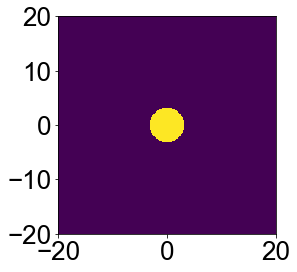

In [25]:
## Let's create some 2D signal
# Blank image
n = 201
p = np.zeros ((n, n))
FOV = 40

# Create the pixel grid and simple input image
y, x = np.mgrid[-40/2:40/2:(1j*n), -40/2:40/2:(1j*n)]
f = 1.0*(np.less(np.abs(x*x*0.1) + np.abs(y*y*0.1),1))

# Display the input image f
imgplot = plt.imshow(abs(f), extent = [-FOV/2, FOV/2, -FOV/2, FOV/2])


In [28]:
def ExampleSystem(f,x,y):
    g = f    # Example A from the lecture notes section 2.4
    g = np.maximum(f,0) # Example B
    g = np.abs(f) # Example C
    g = f + 1 # Example D
    g = f[(x==0)*(y==0)] + 0*f # Example E
    h =  1.0*(np.abs(x)<=2)*(np.abs(y)<=2) # Example F
    g = (x[0,1]-x[0,0])*(y[1,0]-y[0,0])*signal.convolve2d(h, f, mode='same') # Example F (cont)
    # We will revisit example G (Fourier transform) in future lectures and exercises
    return (g)

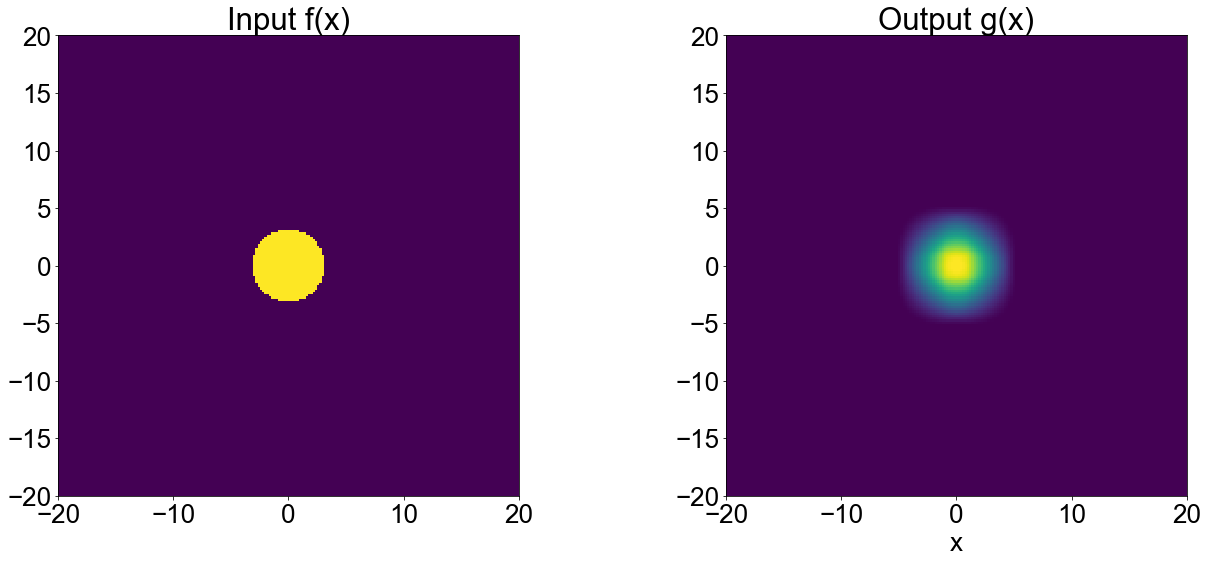

In [29]:
# Now let's run our signal through our system 
g = ExampleSystem(f,x,y)

# Plot the input and output signals
font = {'family' : 'arial',
        'weight' : 'normal',
        'size'   : 26}
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.rc('font', **font)
plt.imshow(f, extent = [-FOV/2, FOV/2, -FOV/2, FOV/2])
plt.title('Input f(x)')
plt.subplot(1,2,2)
plt.rc('font', **font)
plt.imshow(g, extent = [-FOV/2, FOV/2, -FOV/2, FOV/2])
plt.title('Output g(x)')
plt.xlabel('x')
plt.tight_layout(pad=4.0)